<div style="border:solid green 2px; padding: 20px">
    
<b>Антон, привет! Это Александр Матвеевский</b> Я рад тебя видеть на финальном спринте (SQL).

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Предлагаю работать над проектом в диалоге: если у тебя возникают вопросы — пиши об этом в пачке, не стесняйся. Так же, мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>
    
    
---

<div class="alert alert-info" style="background:#ffdbf1;color:#2e00ab;border-left:7px solid #2e00ab">
<b>Комментарий студента №0</b>
    
Привет, есть пара вопросов,почти не по проекту, все они ниже, приятной проверки.

</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Давай посмотрим)
</div>

# Задача - проанализировать базу данных

# Вывод - база данных работает исправно, запросы выполняются, связи между таблицами настроены корректно. 

# Декомпозиция
Задача
Вывод
1 Шаг. Подключение к БД и предобработка данных
    
    * Подключение к БД
    * Проверка на пропуски
    * Проверка на дубликаты
    * Просмотр таблиц
    * Проверка названий столбцов
    * Вывод по шагу
    
    
2 Шаг. Проверка работоспособности БД

    Проверка на выполнение различных запросов
    
    2.1 Количество книг, которые вышли после 1 января 2000 года;
    2.2 Количество обзоров и средняя оценка для каждой книги;
    2.3 Издательство, которое выпустило наибольшее число книг толще 50 страниц;
    2.4 Автор с самой высокой средней оценкой книг(учитывая только книги с 50 и более оценками);
    2.5 Среднее количество обзоров от пользователей, которые поставили больше 50 оценок. 
    
3 Шаг. Вывод
    

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Здорово, что не забываешь про оформление проекта
</div>

<a id="1"></a> 
## Шаг. Подключение к БД и предобработка данных

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine


In [2]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

In [3]:
#просматривать таблицы будем через цикл
def review(tabl):
    query = 'SELECT * FROM ' + tabl
    df = pd.io.sql.read_sql(query, con=engine)
    print(f'Пропусков: {df.isna().sum().sum()}')
    print(f'Дубликатов: {df.duplicated().sum()}')
    display(df.head())

In [4]:
review('books')

Пропусков: 0
Дубликатов: 0


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


Таблица books содержит данные о книгах:
* book_id — идентификатор книги;
* author_id — идентификатор автора;
* title — название книги;
* num_pages — количество страниц;
* publication_date — дата публикации книги;
* publisher_id — идентификатор издателя.

In [5]:
review('authors')

Пропусков: 0
Дубликатов: 0


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


Таблица authors cодержит данные об авторах:
* author_id — идентификатор автора;
* author — имя автора.

In [6]:
review('publishers')

Пропусков: 0
Дубликатов: 0


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


Таблица publishers содержит данные об издательствах:
* publisher_id — идентификатор издательства;
* publisher — название издательства;

In [7]:
review('ratings')

Пропусков: 0
Дубликатов: 0


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


Таблица ratings содержит данные о пользовательских оценках книг:
* rating_id — идентификатор оценки;
* book_id — идентификатор книги;
* username — имя пользователя, оставившего оценку;
* rating — оценка книги.

In [8]:
review('reviews')

Пропусков: 0
Дубликатов: 0


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


Таблица reviews содержит данные о пользовательских обзорах:
* review_id — идентификатор обзора;
* book_id — идентификатор книги;
* username — имя автора обзора;
* text — текст обзора.

<a id="11"></a> 
### Вывод по 1 шагу

В ходе выполнения первого шага были проделаны следующие действия:

    * Подключение к базе данных
    * проверка на пропуски (отсутствуют)
    * проверка на дубликаты (отсутствуют)  
    * просмотр первых 5 строк и названия столбцов 
В распоряжении имеетя база данных:
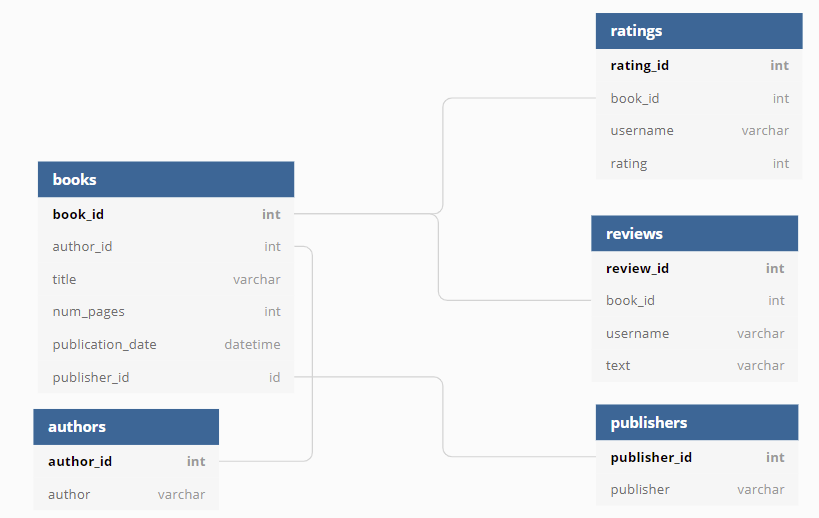


    

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Отлично первый взгляд на данные есть. Ты корректно выгрузил данные и посмотрел их содержимое
</div>

<a id="2"></a>
## Шаг. Проверка работоспособности БД

<a id="21"></a> 
### Количество книг, которые вышли после 1 января 2000 года

In [9]:
query = """
SELECT COUNT(*)
FROM books
WHERE CAST(publication_date AS date) > '2000-01-01'
;
"""

pd.io.sql.read_sql(query, con=engine)

,count
0,819


<div class="alert alert-info" style="background:#ffdbf1;color:#2e00ab;border-left:7px solid #2e00ab">
<b>Комментарий студента №0</b>
    
Вопрос первый: есть ли существенна разница между запросом выше и 
    
    
    """
    SELECT COUNT(publication_date)
    FROM books
    WHERE CAST(publication_date AS date) > '2000-01-01'
    ;
    """
?
    
в тренажере было написано, что вывод запроса имеет вес и чем он меньше(вес) тем лучше, тут мы выводим и первым и вторым запросом всего одну ячейку 
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

На самом деле это хороший вопрос, но для меня это один и тотже подход. Но могу ошибаться, лучше уточнить у Миши Егошина (в канале по SQL)
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Расчёт верный
</div>

<a id="22"></a> 
### Количество обзоров каждой книги и ее средняя оценка

In [10]:
query = """
SELECT b.book_id,
       COUNT(re.review_id) as колво_обзоров,
       AVG(ra.rating) as средняя_оценка
FROM books b
    FULL JOIN reviews re ON b.book_id = re.book_id
    FULL JOIN ratings ra ON b.book_id = ra.book_id
        
GROUP BY b.book_id

;
"""

pd.io.sql.read_sql(query, con=engine)



,book_id,колво_обзоров,средняя_оценка
0,652,4,4.500000
1,273,4,4.500000
2,51,60,4.250000
3,951,4,4.000000
4,839,28,4.285714
...,...,...,...
995,64,52,4.230769
996,55,4,5.000000
997,148,21,3.428571
998,790,4,3.500000


<div class="alert alert-info" style="background:#ffdbf1;color:#2e00ab;border-left:7px solid #2e00ab">
<b>Комментарий студента №0</b>

Во втором запросе я не указывал таблицы для review_id и rating так как в других таблицах нет таких столбцов.

Вопрос второй: стоит взять за привычку всегда указавать название таблиц из которых я беру колонки? (re.review_id и ra.rating)
    
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Да, стоит
</div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

1. Ты вывел только те книги (их всего 1000 книг, а у тебя тут 994), у которых есть текстовые отзывы reviews, а ведь у книг без отзывов оценки никуда не делись и их по задаче необходимо вывести. 
    
---
    
2. Всего ревью в БД 2793, посмотри какая сумма count_review после твоего запроса
</div>

<div class="alert alert-info" style="background:#ffdbf1;color:#2e00ab;border-left:7px solid #2e00ab">
<b>Комментарий студента №1</b>

понял, поправил

</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

Да, теперь всё корректно
</div>

<a id="23"></a> 
### Издательство, которое выпустило наибольшее число книг толще 50 страниц

In [11]:
query = """
WITH pub AS (
    SELECT p.publisher,
           count(b.book_id)       
    FROM books b
        JOIN publishers p ON b.publisher_id = p.publisher_id     
    WHERE b.num_pages > 50
    GROUP BY p.publisher
    ORDER BY count DESC)

SELECT publisher
FROM pub
LIMIT 1

;
"""

pd.io.sql.read_sql(query, con=engine)

,publisher
0,Penguin Books


<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Согласен с результатом. Действительно данное издательство является лидером по выпущенным книгам
</div>

<a id="24"></a> 
### Автор с самой высокой средней оценкой книг(учитывая только книги с 50 и более оценками)

In [15]:
query = """

WITH temp AS
    (SELECT b.book_id,
        COUNT(r.rating_id),
        AVG(r.rating),
        b.author_id
    FROM books b
        JOIN ratings r ON b.book_id = r.book_id
    GROUP BY b.book_id
    ),
    
    authors_avg AS(
    SElECT t.author_id,
        AVG(t.avg)
    FROM temp t
    WHERE count > 49
    GROUP BY t.author_id)

SELECT a.author
FROM authors_avg aa
    JOIN authors a ON a.author_id = aa.author_id    
ORDER BY aa.avg DESC
LIMIT 1
;
"""

pd.io.sql.read_sql(query, con=engine)

,author
0,J.K. Rowling/Mary GrandPré


<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Запрос корректный, но ты не довел решение до конца. Суть в том, что у некоторых авторов несколько книг (если вывести твой запрос без limit). Тебе следовало добавить еще один шаг - рассчитать средний рейтинг автора по средним оценкам его книг.
    
---
    
Также без рейтинга, даннам таблица не имеет смысла
</div>

<div class="alert alert-info" style="background:#ffdbf1;color:#2e00ab;border-left:7px solid #2e00ab">
<b>Комментарий студента №1</b>

понял, поправил

</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__
    
После стольких лет? Всегда...

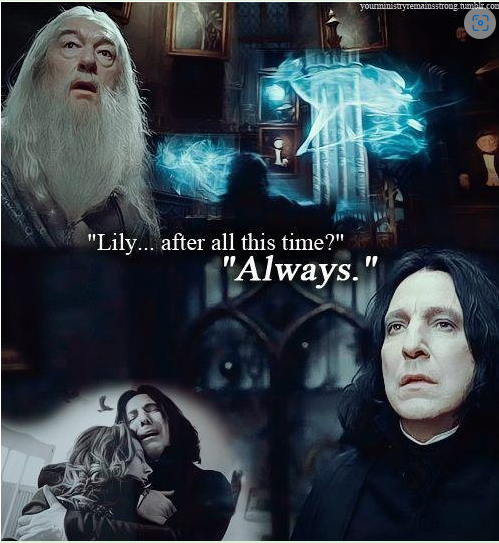

<a id="25"></a> 
### Среднее количество обзоров от пользователей, которые поставили больше 50 оценок

In [13]:
#count_ratings - пользователь и кол-во его оценок
#users - пользователи которые поставили больше 50 оценок
#count_reviews - users + колво их обзоров
query = """
WITH count_ratings AS(
    SELECT username,
       COUNT(rating_id)   
    FROM ratings
    GROUP BY username
    ),
    
    users AS (
    SELECT username
    FROM count_ratings
    WHERE count > 50
    ),
    
    count_reviews AS(
    SELECT COUNT(*),
       u.username
    FROM users u
        JOIN reviews r ON u.username = r.username
    GROUP BY u.username
    )
    
SELECT ROUND(AVG(count),2)
FROM count_reviews
    

;
"""

pd.io.sql.read_sql(query, con=engine)

,round
0,24.33


<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Ты корректно отобрал пользователей и рассчитал их показатели.

<a id="3"></a> 
## Шаг. Вывод

<div class="alert alert-info" style="background:#ffdbf1;color:#2e00ab;border-left:7px solid #2e00ab">
<b>Комментарий студента №0</b>

Вопрос третий в задаче прокта нужно было 

    Опишите выводы по каждой из решённых задач.

По структуре проекта это бы выглядело так :
    
    2.1 Количество книг, которые вышли после 1 января 2000 года
    819
    В базе данных храниться 819 книг которые вышли после 1.01.2000
    
Как по мне так делать не стоит, поэтому предлагаю общий вывод
    
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Да, хорошо, этого вполне хватит

В ходе выполнения проекта мы выяснили

    1) БД работает исправно, запросы выполняются, связи между таблицами настроены корректно.
    2) В базе хранятся 819книг вышедших в 21веке.
    3) 994 книги имеют хотя бы один отзыв и одну оценку.
    4) Больше всего книг, которые есть в нашей библиотеке, выпустило издательство 'Penguin Books'.
    5) Писательница J.K. Rowling и иллюстратор Mary GrandPré за свои книги награждены самой высокой средней оценкой. 
    6) Читатели которые ставят много оценок (больше 50), часто пишут обзоры, в среднем по 24,3 шт на пользователя.


<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

Получилась хорошая работа, развернутый итоговый вывод придает ей вид законченного проекта. Поздравляю с окончанием курса! У тебя получилось справиться со всеми задачами. 
</div>